<h1>(EDA) Resale Car Price Prediction in Singapore

Capstone Project 12 Mar 2022 by Derek Tan

Reference:

https://www.sgcarmart.com/main/about_us.php


https://github.com/xianjinseow92/Data-Science-Projects/tree/master/Project_2_SgCarMart%20Price%20Prediction


demo1 : https://www.sgcarmart.com/used_cars/info.php?ID=1070098&DL=3734&GASRC=dy (Lamborgini Urus)(SUV)


demo2 : https://www.sgcarmart.com/used_cars/info.php?ID=1078684&DL=1000 (Porsche Cayman GTS 3.4A PDK)(Sports Car)

<h1>Importing some libraries

In [1]:
# Data analysis and cleaning
import pandas as pd
import numpy as np
import missingno as msno

# Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocessing and machine learning train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model evaluation 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Deployment
import joblib

In [2]:
#loading the dataset
df = pd.read_csv('sgcarmart_used_cars_prices3.csv')

In [3]:
#Preview the data
df.head()

Unnamed: 0                                        LISTING_URL  \
0           0  https://www.sgcarmart.com/used_cars/info.php?I...   
1           1  https://www.sgcarmart.com/used_cars/info.php?I...   
2           2  https://www.sgcarmart.com/used_cars/info.php?I...   
3           3  https://www.sgcarmart.com/used_cars/info.php?I...   
4           4  https://www.sgcarmart.com/used_cars/info.php?I...   

           BRAND     PRICE  DEPRE_VALUE_PER_YEAR     REG_DATE  MILEAGE_KM  \
0  Mercedes-Benz   77777.0                8720.0  08-Mar-2011         NaN   
1            BMW  215388.0               20270.0  14-Dec-2020     12000.0   
2  Mercedes-Benz  147777.0               15950.0  16-Jul-2020     40000.0   
3          Mazda   68888.0               11100.0  30-Jun-2017     63000.0   
4  Mercedes-Benz  483988.0               42950.0  01-Oct-2021       652.0   

  MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
0              2010              816.0         Auto   
1              2020             1210.0         Auto   
2              2019              740.0         Auto   
3              2017             1210.0         Auto   
4   \nLuxury Sedan              3268.0         2021   

   DEREG_VALUE_FROM_SCRAPE_DATE SCRAPE_DATE      OMV      ARF  \
0                       34031.0  02/03/2022  31893.0  31893.0   
1                       90113.0  02/03/2022  56927.0  74469.0   
2                       49383.0  02/03/2022  26008.0  28412.0   
3                       41340.0  02/03/2022  19513.0  19513.0   
4                      173852.0  02/03/2022      NaN      NaN   

   COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  \
0               38137.0            2929.0              1597.0          1500.0   
1               39500.0            3191.0              1998.0          1470.0   
2               33520.0            3043.0              1595.0          1435.0   
3               50526.0            1922.0              1998.0          1535.0   
4               68310.0            3473.0              2925.0             NaN   

   NO_OF_OWNERS  VEHICLE_TYPE  
0           4.0  Luxury Sedan  
1           2.0  Luxury Sedan  
2           1.0           SUV  
3           1.0           MPV  
4           1.0           NaN

In [4]:
#Explore the features
df.columns

Index(['Unnamed: 0', 'LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR',
       'REG_DATE', 'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR',
       'TRANSMISSION', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV',
       'ARF', 'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

In [5]:
#Dropping features that not for analysis

df.drop(['Unnamed: 0','LISTING_URL','SCRAPE_DATE','REG_DATE'],axis=1,inplace=True)

In [6]:
#Checking for null values
df.isnull().sum().sort_values(ascending=False) 

MILEAGE_KM                      2517
OMV                             2415
DEPRE_VALUE_PER_YEAR            1538
ROAD_TAX_PER_YEAR               1496
ARF                             1256
VEHICLE_TYPE                    1009
DEREG_VALUE_FROM_SCRAPE_DATE     785
NO_OF_OWNERS                     667
COE_FROM_SCRAPE_DATE             623
CURB_WEIGHT_KG                   519
DAYS_OF_COE_LEFT                 210
PRICE                             81
ENGINE_CAPACITY_CC                75
BRAND                              0
MANUFACTURED_YEAR                  0
TRANSMISSION                       0
dtype: int64

<H1>msno to vizualize the Null values

<AxesSubplot:>

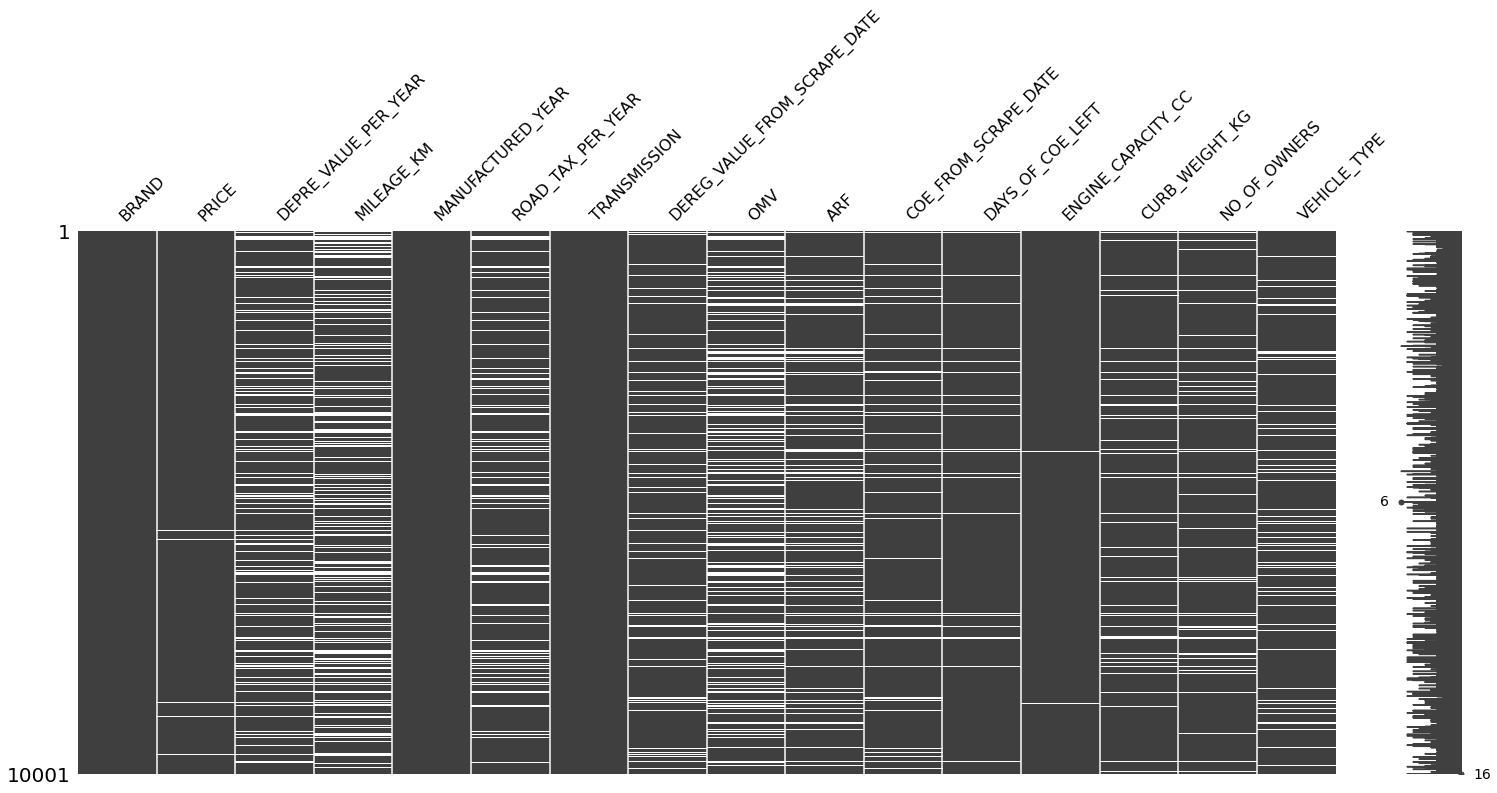

In [7]:
#Explore the null values
msno.matrix(df)

<AxesSubplot:>

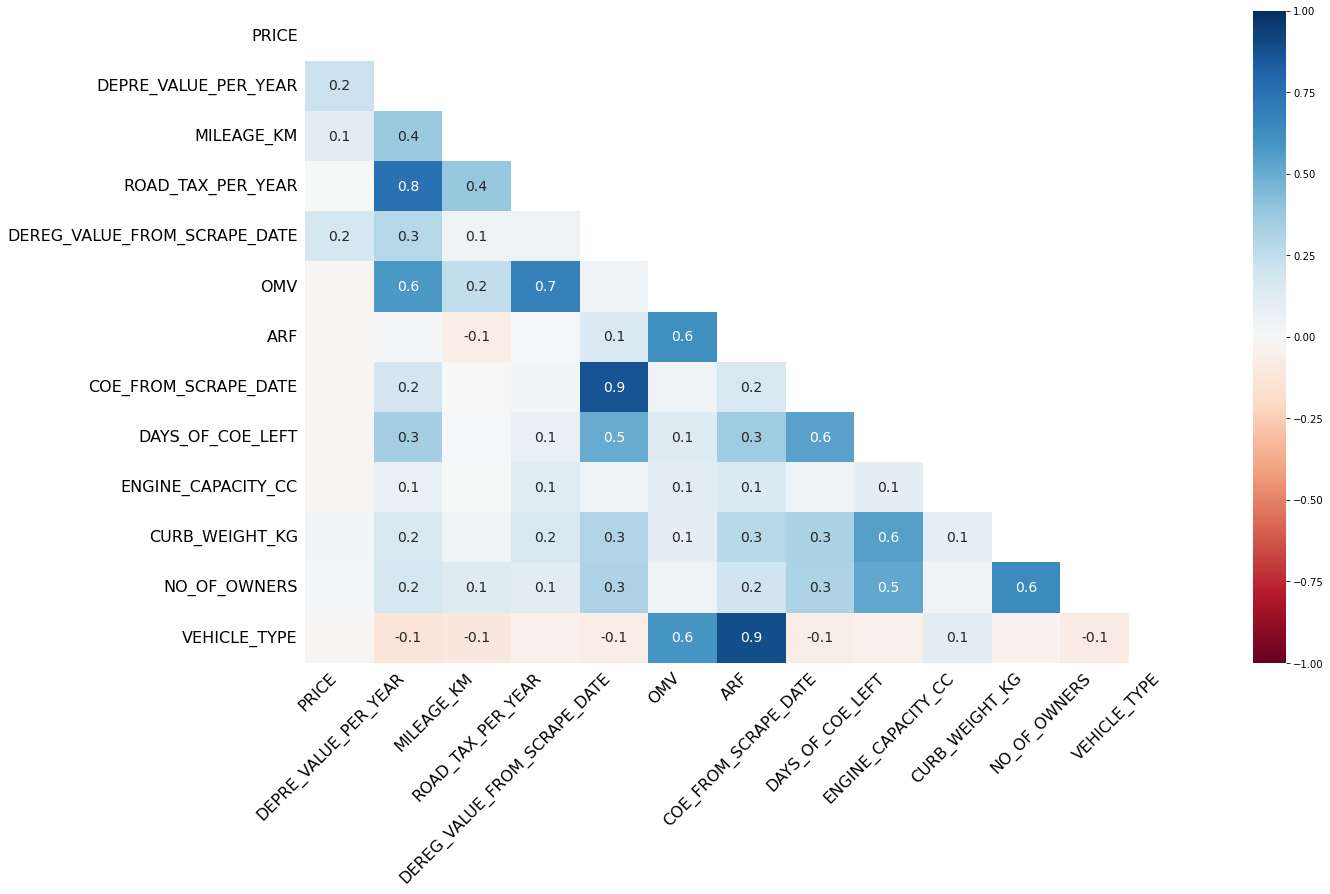

In [8]:
#Correlation of null values
msno.heatmap(df)

In [9]:
# Checking for Duplicates
df.duplicated().sum() 

11

<h1>Dropping all duplicates and na

In [10]:
#Dropping duplications and Na values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [11]:
#Further exlore the features,total data, Dtypes, number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 1 to 9997
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         5400 non-null   object 
 1   PRICE                         5400 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          5400 non-null   float64
 3   MILEAGE_KM                    5400 non-null   float64
 4   MANUFACTURED_YEAR             5400 non-null   object 
 5   ROAD_TAX_PER_YEAR             5400 non-null   float64
 6   TRANSMISSION                  5400 non-null   object 
 7   DEREG_VALUE_FROM_SCRAPE_DATE  5400 non-null   float64
 8   OMV                           5400 non-null   float64
 9   ARF                           5400 non-null   float64
 10  COE_FROM_SCRAPE_DATE          5400 non-null   float64
 11  DAYS_OF_COE_LEFT              5400 non-null   float64
 12  ENGINE_CAPACITY_CC            5400 non-null   float64
 13  CUR

In [12]:
#converting to int
df['MANUFACTURED_YEAR'] = df['MANUFACTURED_YEAR'].astype(int)

In [13]:
#Checking the describe of price
df.describe()

PRICE  DEPRE_VALUE_PER_YEAR     MILEAGE_KM  MANUFACTURED_YEAR  \
count    5400.000000           5400.000000    5400.000000        5400.000000   
mean   124768.861481          19698.768889   75518.950185        2014.899630   
std    122620.044598          25082.516649   49850.664224           4.087205   
min      1078.000000           1232.000000       8.000000        1958.000000   
25%     59800.000000          10400.000000   35000.000000        2012.000000   
50%     86800.000000          13760.000000   72000.000000        2016.000000   
75%    145888.000000          19872.500000  110000.000000        2018.000000   
max    990000.000000         582250.000000  330000.000000        2021.000000   

       ROAD_TAX_PER_YEAR  DEREG_VALUE_FROM_SCRAPE_DATE            OMV  \
count        5400.000000                   5400.000000    5400.000000   
mean         1476.752407                  55510.483704   45696.115000   
std          1380.089285                  56530.683902   53597.473758   
min            50.000000                   2099.000000    4753.000000   
25%           684.000000                  28850.000000   19371.250000   
50%          1115.500000                  40591.500000   30052.000000   
75%          1638.000000                  61165.250000   47791.500000   
max         12402.000000                 806033.000000  741523.000000   

                 ARF  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
count    5400.000000           5400.000000       5400.000000   
mean    53850.505000          46790.290000       2071.444259   
std     77073.468199          16454.062053        898.370254   
min        64.000000           4301.000000          0.000000   
25%     17194.750000          35007.750000       1373.000000   
50%     31238.000000          46790.000000       2098.000000   
75%     54487.000000          56410.000000       2828.000000   
max    884766.000000          97000.000000       3564.000000   

       ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  
count         5400.000000     5400.000000   5400.000000  
mean          2064.297963     1493.345000      2.094444  
std            929.611193      298.999653      1.279574  
min            658.000000        2.000000      1.000000  
25%           1497.000000     1285.000000      1.000000  
50%           1797.000000     1452.000000      2.000000  
75%           2261.000000     1660.000000      3.000000  
max           6761.000000     2905.000000      6.000000

<h1>Removing Outliers

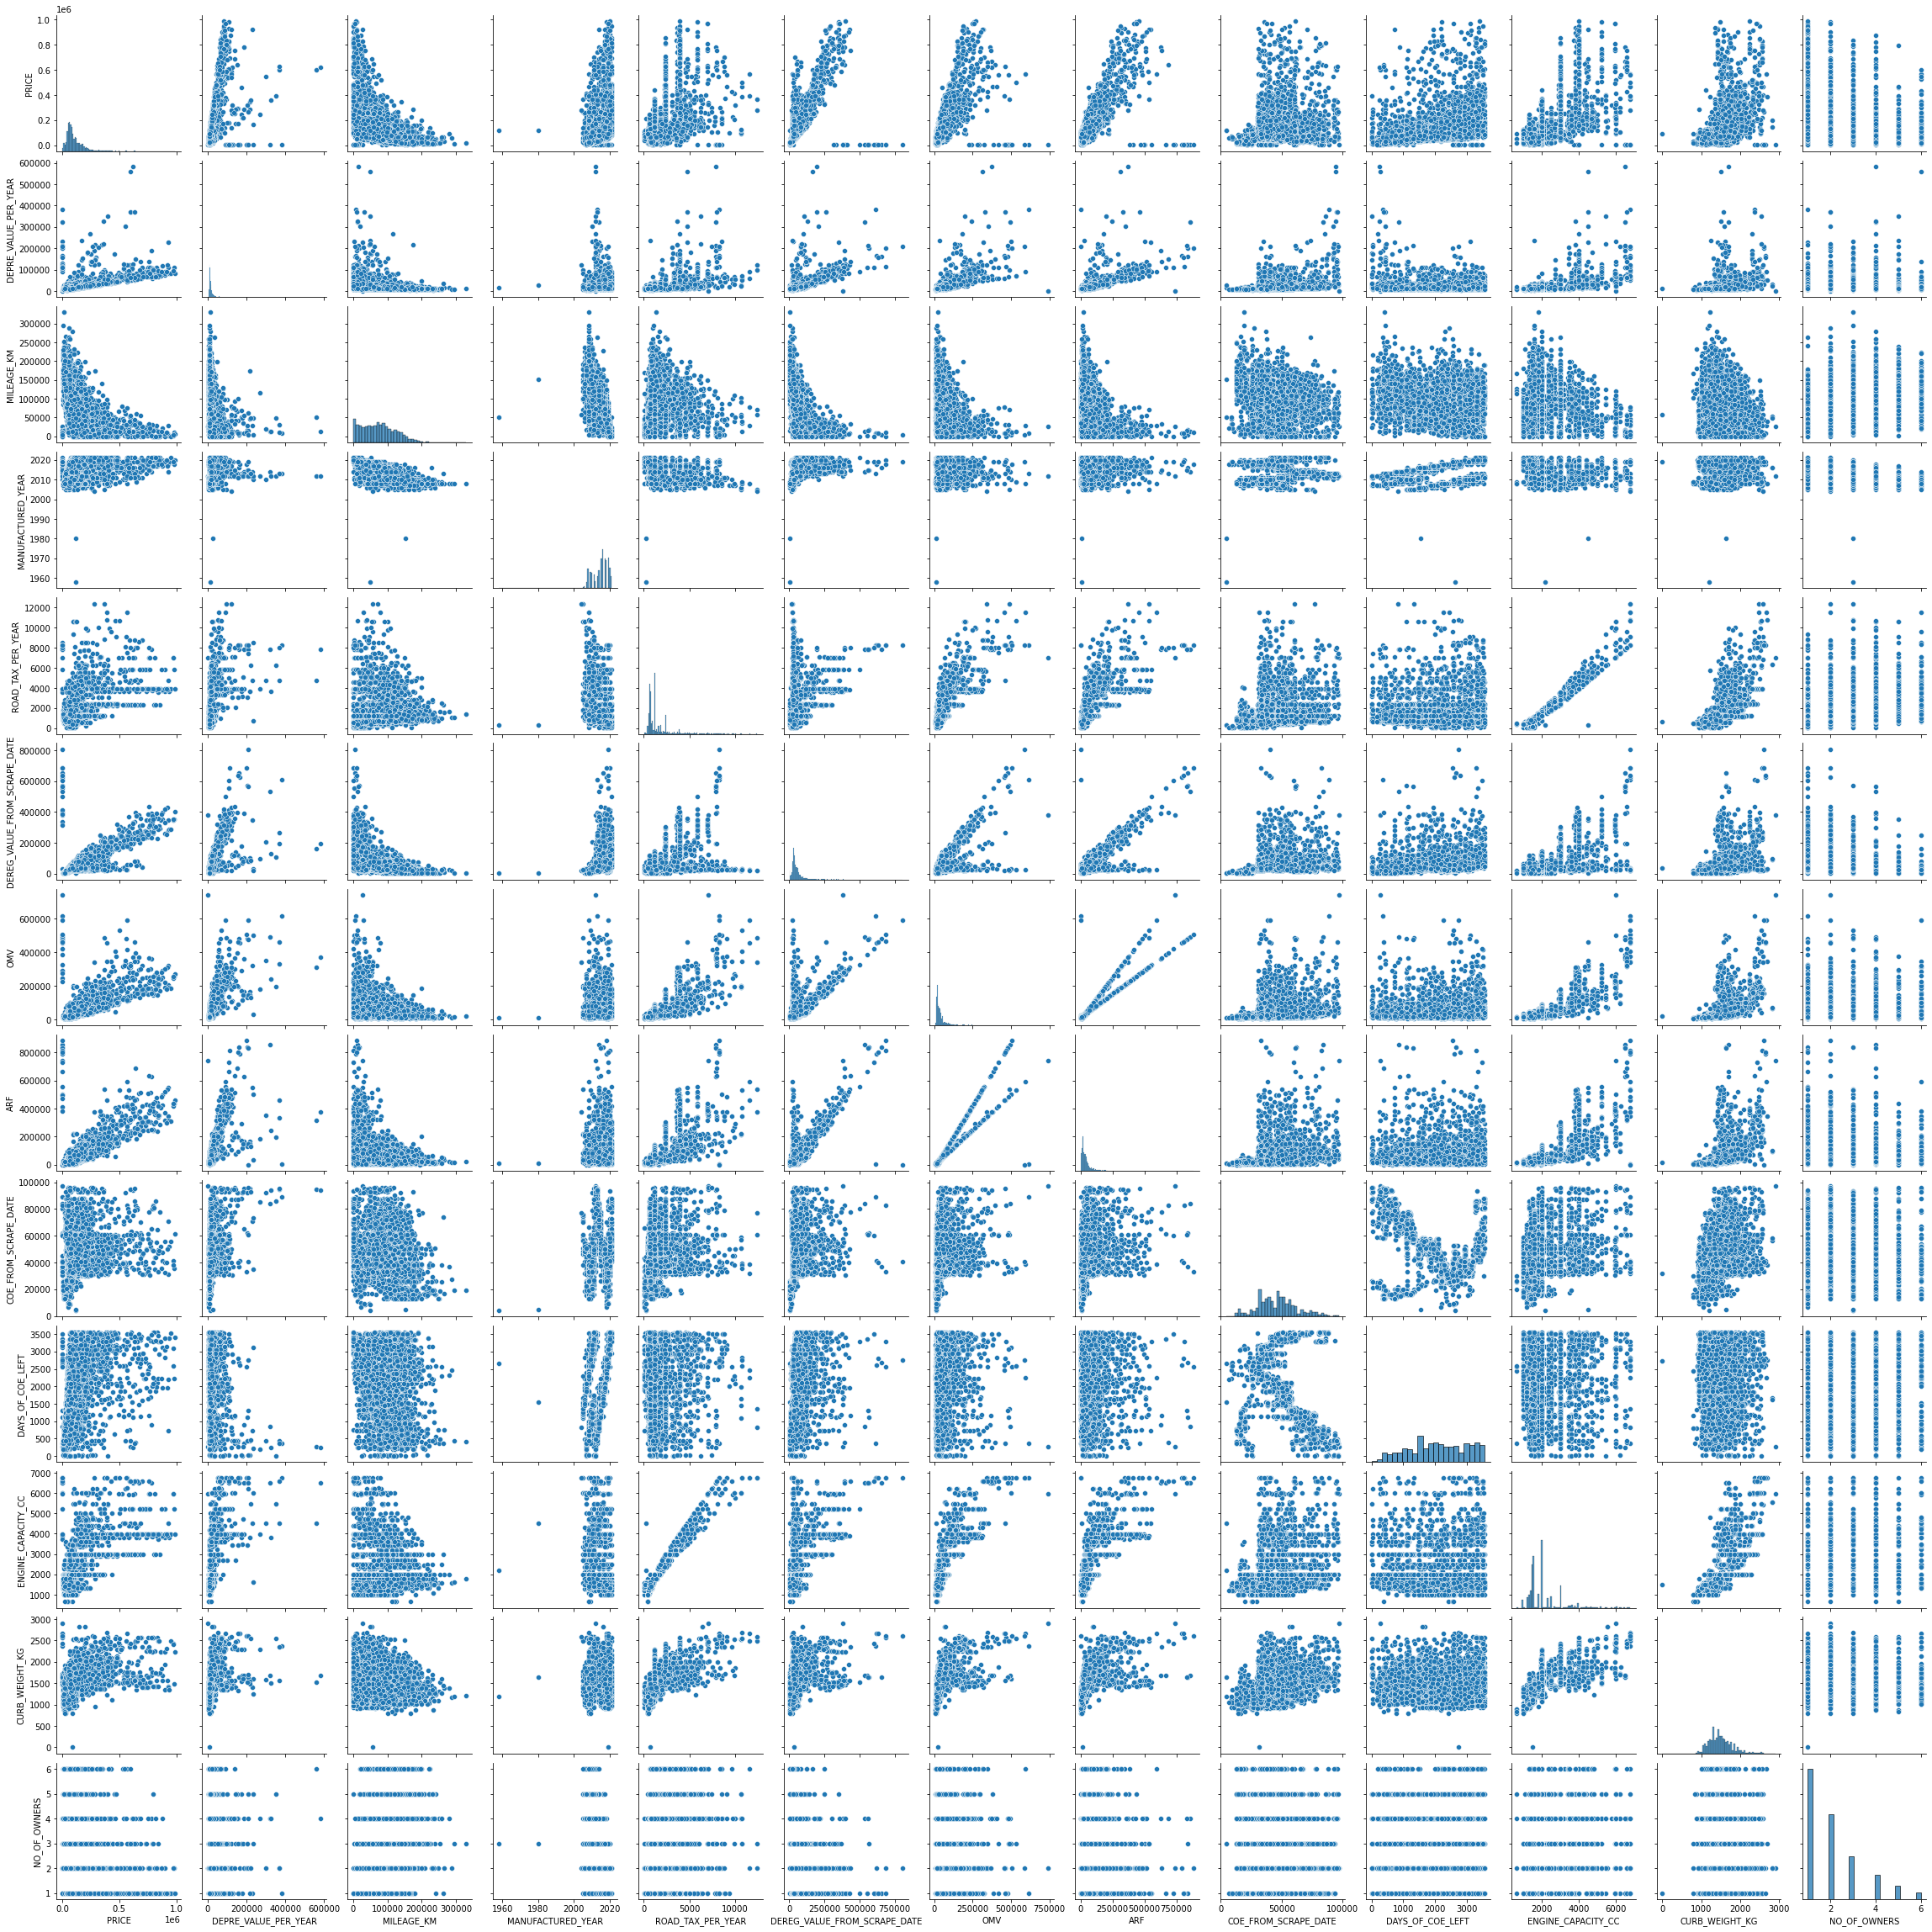

In [14]:
#Using Pairplot to vizualize outliers
sns.pairplot(df)

In [15]:
min_thresold, max_thresold = df.PRICE.quantile([0.004, 0.99])
min_thresold, max_thresold

(6098.0, 727802.0)

In [16]:
min_thresoldm, max_thresoldm = df.MANUFACTURED_YEAR.quantile([0.001, 0.999])
min_thresoldm, max_thresoldm

(2005.0, 2021.0)

In [17]:
df[df.MANUFACTURED_YEAR < min_thresoldm]

BRAND     PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
3610  Mercedes-Benz  118888.0               16240.0     50000.0   
4667  Mercedes-Benz  115000.0               26060.0    151830.0   
7695        Bentley  280000.0              121960.0     57000.0   

      MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
3610               1958              280.0       Manual   
4667               1980              280.0         Auto   
7695               2004            12402.0         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE       OMV       ARF  COE_FROM_SCRAPE_DATE  \
3610                        3149.0   10425.0   10425.0                4301.0   
4667                        2099.0   11557.0   11557.0                4848.0   
7695                       17649.0  339635.0  373599.0               76872.0   

      DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  \
3610            2648.0              2195.0          1195.0           3.0   
4667            1557.0              4520.0          1640.0           3.0   
7695             825.0              6761.0          2585.0           2.0   

      VEHICLE_TYPE  
3610  Luxury Sedan  
4667    Sports Car  
7695  Luxury Sedan

In [18]:
min_thresoldc, max_thresoldc = df.CURB_WEIGHT_KG.quantile([0.0001, 0.999])
min_thresoldc, max_thresoldc

(430.14070000000004, 2660.0)

In [19]:
min_thresoldr, max_thresoldr = df.ROAD_TAX_PER_YEAR.quantile([0.007, 0.999])
min_thresoldr, max_thresoldr

(238.0, 10725.0)

In [20]:
min_thresoldd, max_thresoldd = df.DEPRE_VALUE_PER_YEAR.quantile([0.001, 0.995])
min_thresoldd, max_thresoldd

(6003.84, 172090.00000000023)

In [21]:
df[df['DEPRE_VALUE_PER_YEAR'] > max_thresoldd]

BRAND     PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
38          Bentley  244800.0              267860.0    115000.0   
319         Ferrari    2000.0              232930.0      3000.0   
666     Rolls-Royce    1250.0              382450.0      7800.0   
987     Lamborghini    1200.0              202520.0     18000.0   
1500  Mercedes-Benz  218218.0              177130.0     48998.0   
1987        Ferrari  600000.0              559570.0     50000.0   
3117    Lamborghini    1188.0              322840.0     12600.0   
3207        Ferrari  925000.0              229110.0     28000.0   
3922    Lamborghini  780000.0              188910.0      9000.0   
4781    Lamborghini    1190.0              210880.0     15811.0   
5292        Bentley  283888.0              188410.0     56000.0   
5577        McLaren  358800.0              326140.0     13600.0   
5796        Ferrari  550000.0              301220.0     19500.0   
5839  Mercedes-Benz  395800.0              349490.0     49800.0   
5957    Lamborghini  617800.0              582250.0     14000.0   
6201    Rolls-Royce  598000.0              370050.0     11000.0   
6496        Bentley  248000.0              174080.0     70000.0   
6528        Porsche  348800.0              216360.0     46010.0   
6885        Porsche  288888.0              216580.0    174666.0   
6948           MINI  168168.0              236040.0     49558.0   
7135        Ferrari  630000.0              370170.0     31500.0   
7998    Rolls-Royce    1850.0              200070.0     10500.0   
8296          Aston  218000.0              181140.0     35000.0   
8580        Porsche  318800.0              203170.0     29000.0   
9137  Mercedes-Benz  265000.0              206860.0     62655.0   
9246    Rolls-Royce    2099.0              210070.0      4800.0   
9284  Mercedes-Benz  358000.0              221030.0     49000.0   

      MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
38                 2012             3940.0         Auto   
319                2010             8491.0         Auto   
666                2013             8250.0         Auto   
987                2015             7856.0         Auto   
1500               2012             3164.0         Auto   
1987               2012             4728.0         Auto   
3117               2014             7856.0         Auto   
3207               2014             4728.0         Auto   
3922               2014             7856.0         Auto   
4781               2015             7856.0         Auto   
5292               2013             3940.0         Auto   
5577               2012             3634.0         Auto   
5796               2010             4730.0         Auto   
5839               2012             6236.0         Auto   
5957               2012             7856.0         Auto   
6201               2013             8004.0         Auto   
6496               2012             3940.0         Auto   
6528               2013             3638.0         Auto   
6885               2012             3638.0         Auto   
6948               2012              742.0         Auto   
7135               2013             4728.0         Auto   
7998               2018             8250.0         Auto   
8296               2012             5100.0         Auto   
8580               2012             3068.0         Auto   
9137               2012             7404.0         Auto   
9246               2019             8250.0         Auto   
9284               2013             6236.0         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE       OMV       ARF  COE_FROM_SCRAPE_DATE  \
38                         96304.0  182849.0  182849.0               85216.0   
319                        29996.0  500131.0  500131.0               34935.0   
666                       611505.0  617416.0    1083.0               89001.0   
987                       568655.0  481478.0  838661.0               62019.0   
1500                       67766.0  119058.0  119058.0               92100.0   
1987

In [22]:
df[df['ROAD_TAX_PER_YEAR'] < min_thresoldr]

BRAND     PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
84            Honda   73800.0                9630.0     15000.0   
364           Honda   54888.0                7240.0     33964.0   
520          Nissan   64800.0                7400.0     16700.0   
1300     Mitsubishi  102888.0               11200.0     18000.0   
1489     Mitsubishi   52800.0                7220.0     48000.0   
1672          Honda   64500.0                8070.0     46666.0   
2015     Mitsubishi   41800.0                7290.0     69400.0   
2028     Mitsubishi   49888.0                7210.0     12423.0   
2053         Nissan   49800.0                7280.0     42304.0   
2287          Honda   69800.0                7830.0     12000.0   
2426          Honda   85888.0                9490.0        16.0   
2494         Nissan   53800.0                6930.0     21850.0   
3377           Ford   53800.0                8300.0     19873.0   
3557         Nissan   49800.0                7280.0     31000.0   
4310          Honda   68800.0                9220.0     50080.0   
4359     Volkswagen   50800.0                7930.0    169000.0   
5015          Honda   77777.0                8300.0      8855.0   
5030          Honda   69999.0               10730.0     52600.0   
5192        Hyundai   62800.0                6890.0     11990.0   
5432         Nissan   46800.0                7300.0     27000.0   
5659          Honda   48288.0                8590.0     20350.0   
6006          Honda   94888.0                9230.0        38.0   
6054            Kia  109999.0               10710.0      5881.0   
6088         Nissan   62800.0               10770.0     19800.0   
6309         Nissan   54800.0                7640.0     22500.0   
7051     Volkswagen  118800.0               12380.0      6974.0   
7075          Honda   73800.0                7950.0      9000.0   
7451          Mazda   45188.0                8280.0     42300.0   
7461  Mercedes-Benz   86800.0               17340.0     45882.0   
7999          Honda   54300.0                8200.0     30000.0   
8105        Hyundai   61800.0                6800.0      4680.0   
8882     Volkswagen   46900.0               11330.0     30000.0   
9472     Mitsubishi   36802.0               10840.0    113000.0   
9659          Mazda   48500.0                7920.0     20617.0   
9677         Toyota   68888.0                8090.0     23455.0   

      MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
84                 2019               78.0         Auto   
364                2018               78.0         Auto   
520                2020               70.0         Auto   
1300               2019               50.0         Auto   
1489               2018               70.0         Auto   
1672               2019              182.0         Auto   
2015               2017               70.0         Auto   
2028               2018               70.0         Auto   
2053               2018               70.0         Auto   
2287               2020               78.0         Auto   
2426               2020               78.0         Auto   
2494               2019               70.0         Auto   
3377               2016               70.0         Auto   
3557               2018               70.0         Auto   
4310               2018              182.0         Auto   
4359               2008               68.0         Auto   
5015               2019              182.0         Auto   
5030               2016              182.0         Auto   
5192               2019              108.0         Auto   
5432               2018               70.0         Auto   
5659               2016              184.0         Auto   
6006               2019              182.0         Auto   
6054               2021              100.0         Auto   
6088               2016               70.0         Auto   
6309               2018               50.0         Auto   
7051               2019              124.0         Auto   
7075    

In [23]:
df[df.CURB_WEIGHT_KG < min_thresoldc]

BRAND    PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  MANUFACTURED_YEAR  \
8645  Honda  89800.0               10830.0     57000.0               2019   

      ROAD_TAX_PER_YEAR TRANSMISSION  DEREG_VALUE_FROM_SCRAPE_DATE      OMV  \
8645              682.0         Auto                       35989.0  24260.0   

          ARF  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  \
8645  15964.0               31783.0            2742.0              1496.0   

      CURB_WEIGHT_KG  NO_OF_OWNERS VEHICLE_TYPE  
8645             2.0           1.0          SUV

In [24]:
df[df.CURB_WEIGHT_KG > max_thresoldc]

BRAND     PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
285   Rolls-Royce  569000.0               91010.0     29400.0   
1365      Maybach    1360.0                1232.0     26200.0   
3731     Infiniti  198000.0               32350.0     53900.0   
7283      Bentley  388988.0               51650.0     39900.0   
8557     Infiniti  147800.0               22300.0     49000.0   

      MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
285                2008            11550.0         Auto   
1365               2012             7046.0         Auto   
3731               2016             6378.0         Auto   
7283               2008            10748.0         Auto   
8557               2016             6378.0         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE       OMV       ARF  COE_FROM_SCRAPE_DATE  \
285                        24203.0  592131.0  592131.0               38712.0   
1365                      378022.0  741523.0  741523.0               97000.0   
3731                       92351.0   68117.0   94611.0               56089.0   
7283                       28575.0  346418.0  346418.0               37941.0   
8557                       94436.0   70163.0   98294.0               58201.0   

      DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  \
285             2259.0              6749.0          2670.0           6.0   
1365             278.0              5980.0          2905.0           2.0   
3731            1675.0              5552.0          2815.0           2.0   
7283            2743.0              6761.0          2695.0           3.0   
8557            1611.0              5552.0          2815.0           2.0   

      VEHICLE_TYPE  
285   Luxury Sedan  
1365  Luxury Sedan  
3731           SUV  
7283  Luxury Sedan  
8557           SUV

In [25]:
df[df.PRICE < min_thresold]

BRAND   PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
319       Ferrari  2000.0              232930.0      3000.0   
666   Rolls-Royce  1250.0              382450.0      7800.0   
960       Porsche  1268.0              127440.0      5388.0   
987   Lamborghini  1200.0              202520.0     18000.0   
1365      Maybach  1360.0                1232.0     26200.0   
1459  Lamborghini  1599.0              160050.0      4511.0   
1521  Rolls-Royce  1580.0              163550.0      8500.0   
1613      McLaren  1180.0              130250.0     14000.0   
1703      Ferrari  1199.0              107790.0      5999.0   
1867  Lamborghini  1180.0               91110.0        88.0   
2107      Porsche  1078.0              100300.0        88.0   
2299      Porsche  1300.0              122280.0       120.0   
2609  Lamborghini  1360.0              111120.0      2300.0   
3005       Toyota  5800.0               11030.0     83879.0   
3117  Lamborghini  1188.0              322840.0     12600.0   
4781  Lamborghini  1190.0              210880.0     15811.0   
7188        Honda  5800.0                8330.0     95000.0   
7284  Rolls-Royce  1535.0              114240.0        88.0   
7998  Rolls-Royce  1850.0              200070.0     10500.0   
8893  Rolls-Royce  1405.0              108430.0        68.0   
8965  Rolls-Royce  1620.0              157710.0      9319.0   
9246  Rolls-Royce  2099.0              210070.0      4800.0   

      MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
319                2010             8491.0         Auto   
666                2013             8250.0         Auto   
960                2019             3944.0       Manual   
987                2015             7856.0         Auto   
1365               2012             7046.0         Auto   
1459               2016             7856.0         Auto   
1521               2018             8250.0         Auto   
1613               2019             3940.0         Auto   
1703               2020             3796.0         Auto   
1867               2021             5834.0         Auto   
2107               2020             3552.0         Auto   
2299               2019             3944.0       Manual   
2609               2019             7856.0         Auto   
3005               2007             1026.0         Auto   
3117               2014             7856.0         Auto   
4781               2015             7856.0         Auto   
7188               2007              885.0         Auto   
7284               2020             8250.0         Auto   
7998               2018             8250.0         Auto   
8893               2019             8004.0         Auto   
8965               2019             8250.0         Auto   
9246               2019             8250.0         Auto   

      DEREG_VALUE_FROM_SCRAPE_DATE       OMV       ARF  COE_FROM_SCRAPE_DATE  \
319                        29996.0  500131.0  500131.0               34935.0   
666                       611505.0  617416.0    1083.0               89001.0   
960                       397558.0  291725.0  497105.0               30890.0   
987                       568655.0  481478.0  838661.0               62019.0   
1365                      378022.0  741523.0  741523.0               97000.0   
1459                      652938.0  480648.0  837167.0               36901.0   
1521                      622783.0  455760.0  792368.0               41000.0   
1613                      334633.0  244632.0  412338.0               36901.0   
1703                      411436.0  290872.0  495570.0               45012.0   
1867                      497442.0  325111.0  557200.0               80401.0   
2107                      316906.0  227626.0  381727.0               41503.0   
2299                      383072.0  278169.0  472705.0               40301.0   
2609                      556295.0  385739.0  666331.0               61190.0   
3005                        2319.0   12466.0   13713.0               22041.0   
3117

In [26]:
df[df.PRICE > max_thresold]

BRAND     PRICE  DEPRE_VALUE_PER_YEAR  MILEAGE_KM  \
347   Mercedes-Benz  794988.0               69540.0        85.0   
416         Porsche  750000.0               87400.0      6900.0   
598         Porsche  838000.0               73770.0      4000.0   
658         McLaren  828800.0              104120.0     16288.0   
999         Porsche  930888.0              110410.0      2550.0   
1030  Mercedes-Benz  795988.0               68590.0        60.0   
1237        Porsche  728000.0               78630.0     20000.0   
1304        Bentley  808800.0               74780.0     19027.0   
1797        Ferrari  775300.0              111100.0     24000.0   
1849        Ferrari  880000.0               77820.0      8000.0   
1956          Aston  775000.0               67960.0     11000.0   
1976        Porsche  855988.0               71980.0       652.0   
2512        Bentley  858800.0               72580.0      3000.0   
2823        Bentley  758000.0               79650.0     13000.0   
3098  Mercedes-Benz  830988.0               72890.0       652.0   
3207        Ferrari  925000.0              229110.0     28000.0   
3234        Porsche  739000.0               97010.0     14900.0   
3521        McLaren  899000.0               88840.0      3000.0   
3733        Bentley  843000.0               67160.0        88.0   
3757        McLaren  810000.0               97320.0     22800.0   
3922    Lamborghini  780000.0              188910.0      9000.0   
4036        McLaren  819000.0              107210.0     20071.0   
4189    Lamborghini  750888.0              108700.0     30000.0   
4953        McLaren  938000.0               83650.0      2000.0   
5066        Bentley  784800.0               60590.0        88.0   
5120  Mercedes-Benz  750000.0               67290.0      2200.0   
5404    Lamborghini  728000.0               91600.0      5000.0   
5564        Ferrari  878000.0              117160.0     22000.0   
5594        Porsche  740800.0               89630.0      2300.0   
5681  Mercedes-Benz  794988.0               67570.0        88.0   
5930          Aston  738000.0               66490.0      7000.0   
5945    Lamborghini  980000.0              109200.0      9800.0   
5996        Bentley  969000.0               88860.0      2788.0   
6446        Bentley  899988.0               76600.0        88.0   
6491    Lamborghini  768800.0              109020.0     11000.0   
6510        Porsche  805988.0               67220.0        66.0   
6789        Ferrari  828000.0              108300.0     28000.0   
6856        Bentley  950988.0               81840.0       652.0   
7346        Bentley  990000.0               81280.0      6600.0   
7373        Ferrari  920000.0              121590.0      8800.0   
7431        Bentley  969000.0               94010.0      4035.0   
7600        Bentley  848800.0               75470.0      1800.0   
8029        Ferrari  788800.0              104710.0     30027.0   
8154        McLaren  798000.0              101490.0     17200.0   
8251        McLaren  838000.0               95580.0     12300.0   
8352          Aston  900000.0               81850.0      6500.0   
8450  Mercedes-Benz  780000.0               68570.0      1800.0   
8579    Lamborghini  753000.0               91430.0     29000.0   
8665        McLaren  798800.0               98270.0     16000.0   
8803    Rolls-Royce  757000.0              138600.0     34000.0   
9047        Porsche  817988.0               66830.0        18.0   
9161    Lamborghini  916888.0               88970.0     11000.0   
9781          Aston  870000.0               89770.0     12500.0   
9964        Bentley  768800.0               81500.0     22000.0   

      MANUFACTURED_YEAR  ROAD_TAX_PER_YEAR TRANSMISSION  \
347                2020             3922.0         Auto   
416                2018             3944.0         Auto   
598                2020             3552.0         Auto   
658                2017             3940.0         Auto   
999                2018          

In [27]:
df2 = df[(df.PRICE > min_thresold) & (df.CURB_WEIGHT_KG > min_thresoldc) & (df['ROAD_TAX_PER_YEAR'] > min_thresoldr) & 
         (df.MANUFACTURED_YEAR > min_thresoldm)]
df2.shape

(5318, 16)

In [28]:
df2.describe()

PRICE  DEPRE_VALUE_PER_YEAR     MILEAGE_KM  MANUFACTURED_YEAR  \
count    5318.000000           5318.000000    5318.000000        5318.000000   
mean   125802.998308          19213.147800   75973.313464        2014.916886   
std    123049.005543          23039.322643   49700.776922           3.958199   
min      6300.000000           5220.000000       8.000000        2006.000000   
25%     60800.000000          10430.000000   35424.250000        2012.000000   
50%     87800.000000          13820.000000   73000.000000        2016.000000   
75%    146888.000000          19850.000000  110000.000000        2018.000000   
max    990000.000000         582250.000000  330000.000000        2021.000000   

       ROAD_TAX_PER_YEAR  DEREG_VALUE_FROM_SCRAPE_DATE            OMV  \
count        5318.000000                   5318.000000    5318.000000   
mean         1458.292779                  54182.465024   44306.655134   
std          1310.048334                  48269.975122   46976.485353   
min           242.000000                   2500.000000    4753.000000   
25%           684.000000                  29184.750000   19473.000000   
50%          1169.000000                  40923.500000   30160.500000   
75%          1634.000000                  61226.000000   47671.500000   
max         11550.000000                 435209.000000  592131.000000   

                 ARF  COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  \
count    5318.000000           5318.000000       5318.000000   
mean    51964.088379          46930.732794       2070.363671   
std     67400.067428          16298.708780        899.079451   
min        64.000000          12763.000000          0.000000   
25%     17500.000000          35403.000000       1373.000000   
50%     31450.500000          47000.000000       2096.500000   
75%     54423.250000          56410.000000       2828.000000   
max    688654.000000          96210.000000       3564.000000   

       ENGINE_CAPACITY_CC  CURB_WEIGHT_KG  NO_OF_OWNERS  
count         5318.000000     5318.000000   5318.000000  
mean          2051.448853     1493.705340      2.098157  
std            894.017044      294.075166      1.280836  
min            658.000000      795.000000      1.000000  
25%           1498.000000     1285.000000      1.000000  
50%           1797.000000     1454.000000      2.000000  
75%           2156.000000     1663.750000      3.000000  
max           6761.000000     2815.000000      6.000000

In [29]:
#Checking the unique types of MANUFACTURED_YEAR
df2['MANUFACTURED_YEAR'].sort_values().unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021])

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Manufactured Year')

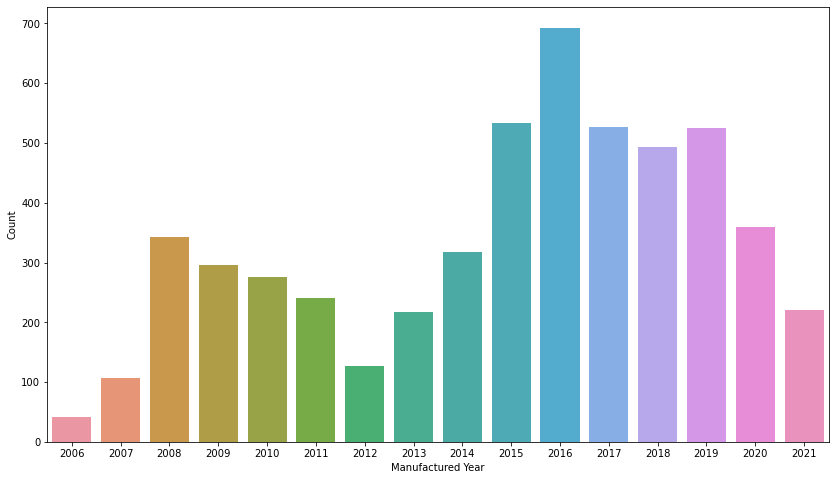

In [30]:
plt.figure(figsize=(14,8))
sns.countplot(df2['MANUFACTURED_YEAR'].sort_values())
plt.ylabel('Count')
plt.xlabel('Manufactured Year')

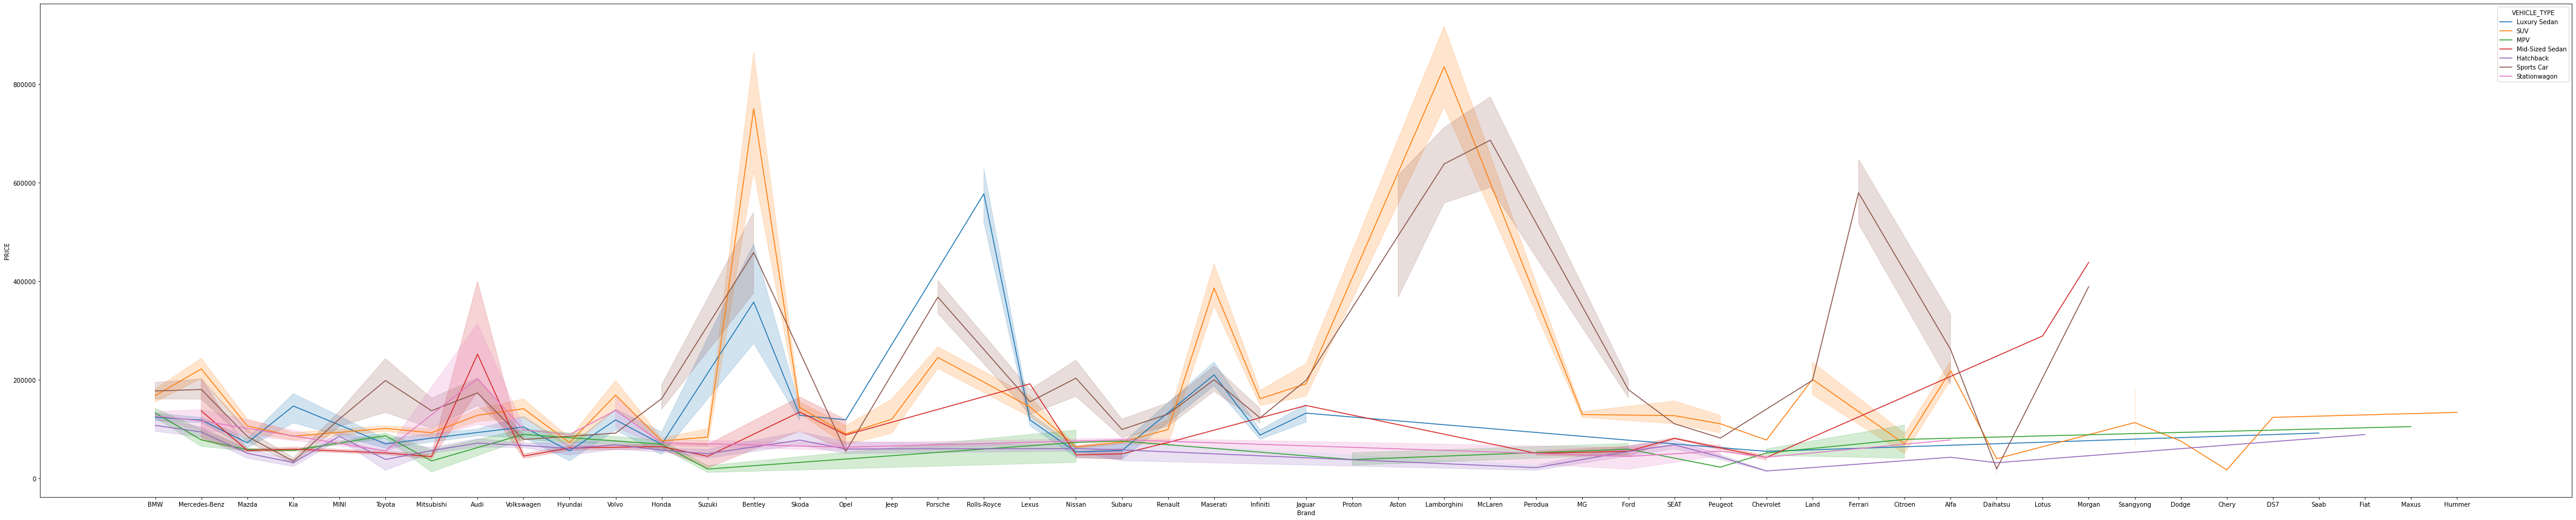

In [31]:
#plotting brand vs price with vehicle type
plt.figure(figsize=(75,15))
sns.lineplot(data=df2, x="BRAND", y="PRICE", hue='VEHICLE_TYPE')
plt.xlabel('Brand')
plt.show()

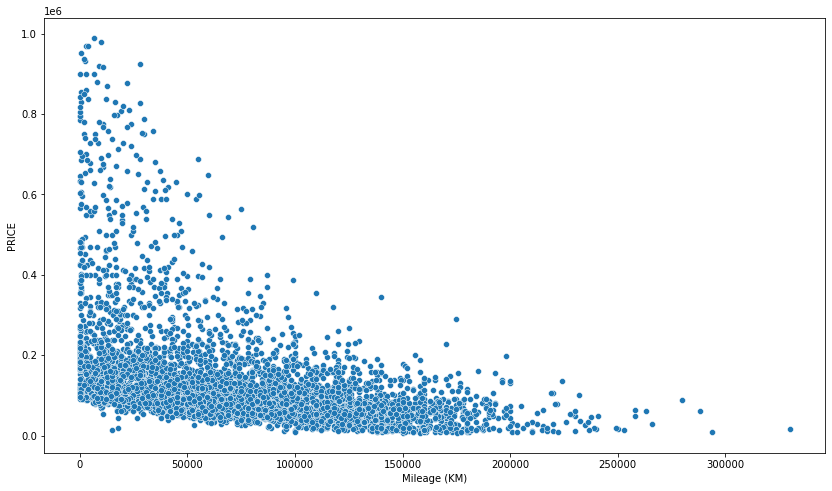

In [32]:
#Engine cc vs price chart
plt.figure(figsize=(14,8))
sns.scatterplot(data=df2, x="MILEAGE_KM", y="PRICE")
plt.xlabel('Mileage (KM)')
plt.show()

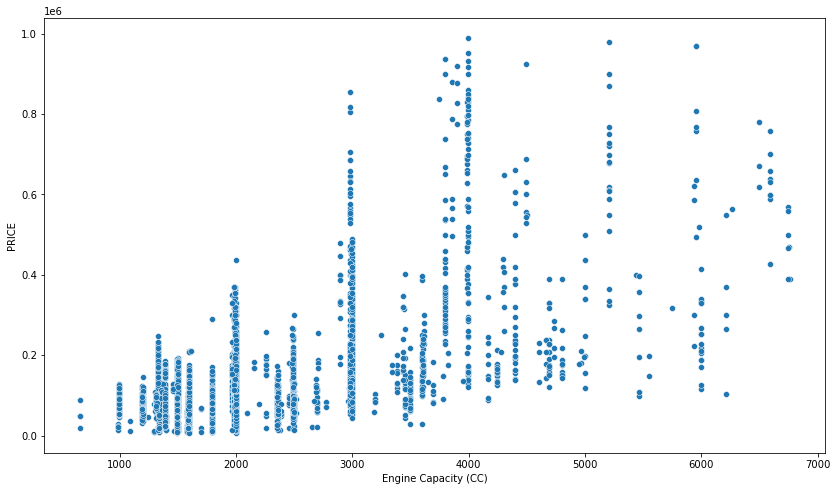

In [33]:
#mileage vs price chart
plt.figure(figsize=(14,8))
sns.scatterplot(data=df2, x="ENGINE_CAPACITY_CC", y="PRICE")
plt.xlabel('Engine Capacity (CC)')
plt.show()


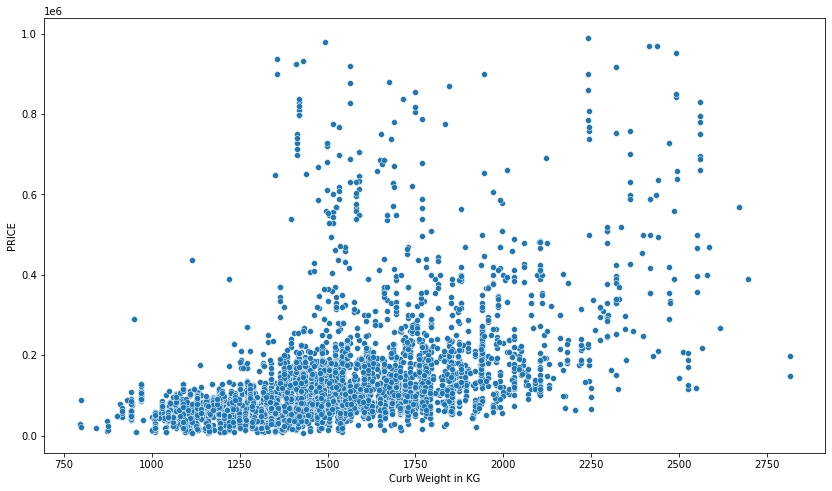

In [34]:
#CURB_WEIGHT_KG vs price chart
plt.figure(figsize=(14,8))
sns.scatterplot(data=df2, x="CURB_WEIGHT_KG", y="PRICE")
plt.xlabel('Curb Weight in KG')
plt.show()

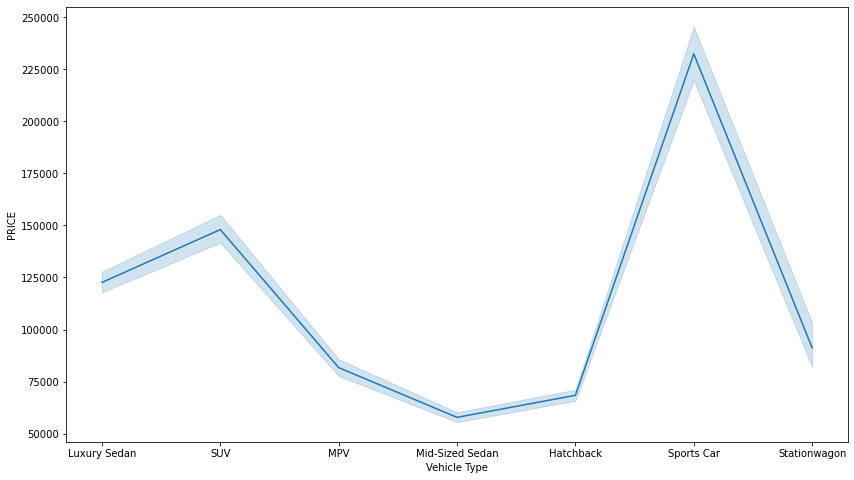

In [35]:
#VEHICLE_TYPE vs price chart
plt.figure(figsize=(14,8))
sns.lineplot(data=df2, x="VEHICLE_TYPE", y="PRICE")
plt.xlabel('Vehicle Type')
plt.show()

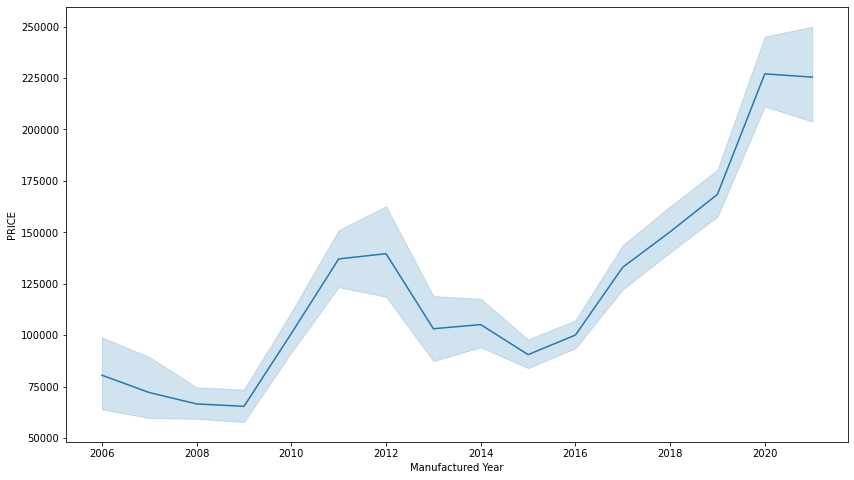

In [36]:
#NO_OF_OWNERS vs price chart
plt.figure(figsize=(14,8))
sns.lineplot(data=df2, x="MANUFACTURED_YEAR", y="PRICE")
plt.xlabel('Manufactured Year')
plt.show()

C:\Users\derek\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

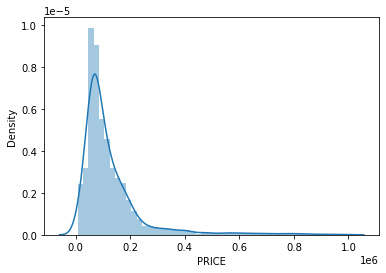

In [37]:
#density of price
sns.distplot(df2['PRICE'])

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


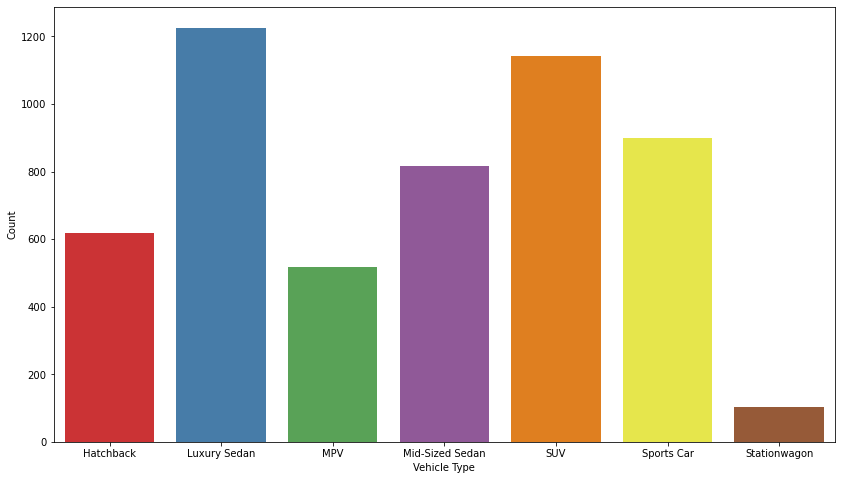

In [38]:
#vehicle type chart
plt.figure(figsize=(14,8))
sns.countplot(df2.sort_values('VEHICLE_TYPE').VEHICLE_TYPE,palette='Set1')
plt.ylabel('Count')
plt.xlabel('Vehicle Type')
plt.show()

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


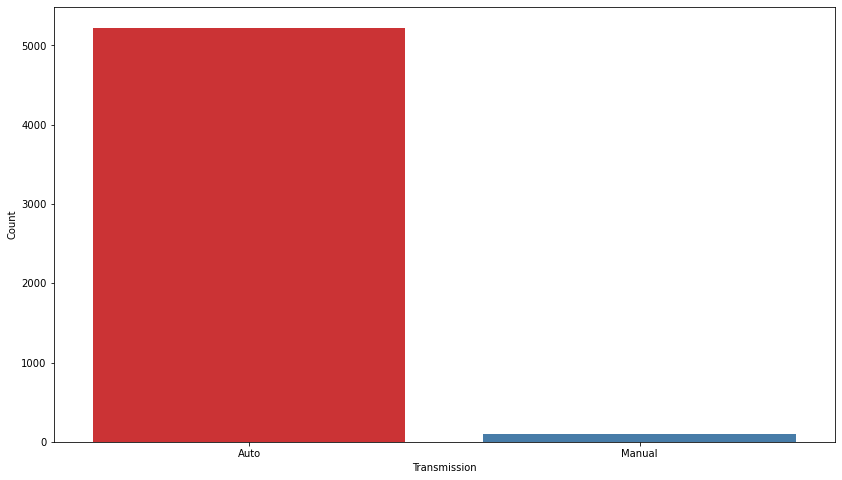

In [39]:
#Tranmission type chart
plt.figure(figsize=(14,8))
sns.countplot(df2.sort_values('TRANSMISSION').TRANSMISSION,palette='Set1')
plt.ylabel('Count')
plt.xlabel('Transmission')
plt.show()

In [40]:
#values of transmission
df2['TRANSMISSION'].value_counts()

Auto      5223
Manual      95
Name: TRANSMISSION, dtype: int64

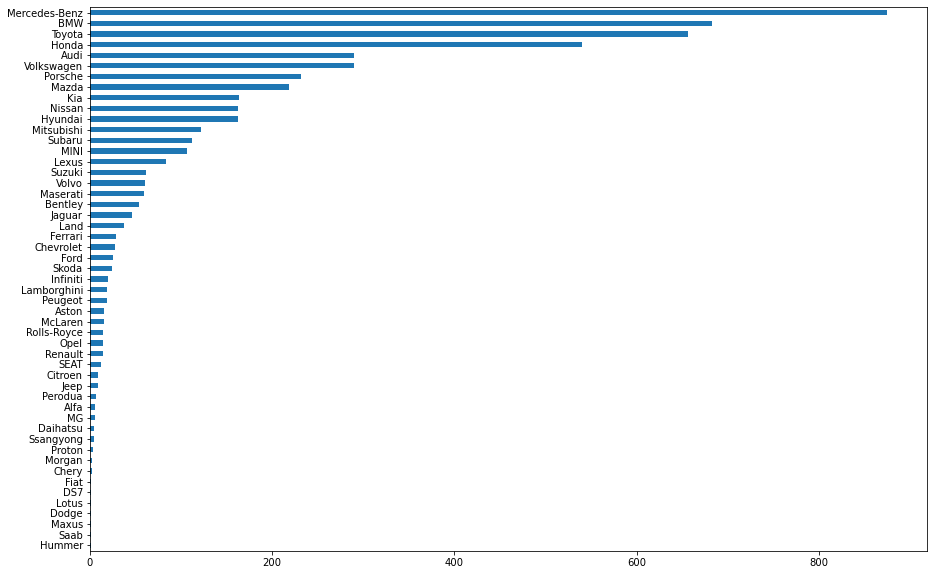

In [41]:
#brand chart
df2['BRAND'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [42]:
df2['BRAND'].value_counts()

Mercedes-Benz    875
BMW              683
Toyota           656
Honda            540
Audi             290
Volkswagen       290
Porsche          232
Mazda            218
Kia              164
Hyundai          162
Nissan           162
Mitsubishi       122
Subaru           112
MINI             106
Lexus             83
Suzuki            62
Volvo             60
Maserati          59
Bentley           54
Jaguar            46
Land              37
Ferrari           29
Chevrolet         27
Ford              25
Skoda             24
Infiniti          20
Peugeot           19
Lamborghini       19
Aston             15
McLaren           15
Rolls-Royce       14
Opel              14
Renault           14
SEAT              12
Jeep               9
Citroen            9
Perodua            7
Alfa               6
MG                 5
Daihatsu           4
Ssangyong          4
Proton             3
Morgan             2
Chery              2
Saab               1
Maxus              1
Fiat               1
Lotus        

In [43]:
df2.dtypes

BRAND                            object
PRICE                           float64
DEPRE_VALUE_PER_YEAR            float64
MILEAGE_KM                      float64
MANUFACTURED_YEAR                 int32
ROAD_TAX_PER_YEAR               float64
TRANSMISSION                     object
DEREG_VALUE_FROM_SCRAPE_DATE    float64
OMV                             float64
ARF                             float64
COE_FROM_SCRAPE_DATE            float64
DAYS_OF_COE_LEFT                float64
ENGINE_CAPACITY_CC              float64
CURB_WEIGHT_KG                  float64
NO_OF_OWNERS                    float64
VEHICLE_TYPE                     object
dtype: object

In [44]:
enc=LabelEncoder()

BRAND = enc.fit_transform(df2['BRAND'])
df2['BRAND'] = BRAND

C:\Users\derek\AppData\Local\Temp/ipykernel_784/191548974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BRAND'] = BRAND


In [45]:
df2['BRAND'].value_counts()

31    875
3     683
48    656
14    540
2     290
49    290
38    232
29    218
20    164
16    162
34    162
32    122
46    112
26    106
23     83
47     62
50     60
27     59
4      54
18     46
22     37
11     29
6      27
13     25
44     24
17     20
37     19
21     19
1      15
30     15
41     14
35     14
40     14
42     12
19      9
7       9
36      7
0       6
25      5
9       4
45      4
39      3
33      2
5       2
43      1
28      1
12      1
24      1
8       1
10      1
15      1
Name: BRAND, dtype: int64

In [46]:
TRANSMISSION = enc.fit_transform(df2['TRANSMISSION'])
df2['TRANSMISSION'] = TRANSMISSION
df2['TRANSMISSION'].value_counts()
#0 = Auto
#1 = Manual

C:\Users\derek\AppData\Local\Temp/ipykernel_784/1642999865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TRANSMISSION'] = TRANSMISSION


0    5223
1      95
Name: TRANSMISSION, dtype: int64

In [47]:
df2['VEHICLE_TYPE'].value_counts()

Luxury Sedan       1226
SUV                1142
Sports Car          898
Mid-Sized Sedan     815
Hatchback           617
MPV                 517
Stationwagon        103
Name: VEHICLE_TYPE, dtype: int64

In [48]:
VEHICLE_TYPE = enc.fit_transform(df2['VEHICLE_TYPE'])
df2['VEHICLE_TYPE'] = VEHICLE_TYPE
df2['VEHICLE_TYPE'].value_counts()

C:\Users\derek\AppData\Local\Temp/ipykernel_784/1692584727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VEHICLE_TYPE'] = VEHICLE_TYPE


1    1226
4    1142
5     898
3     815
0     617
2     517
6     103
Name: VEHICLE_TYPE, dtype: int64

<h1>Correlation Matrix

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 1 to 9997
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         5318 non-null   int32  
 1   PRICE                         5318 non-null   float64
 2   DEPRE_VALUE_PER_YEAR          5318 non-null   float64
 3   MILEAGE_KM                    5318 non-null   float64
 4   MANUFACTURED_YEAR             5318 non-null   int32  
 5   ROAD_TAX_PER_YEAR             5318 non-null   float64
 6   TRANSMISSION                  5318 non-null   int32  
 7   DEREG_VALUE_FROM_SCRAPE_DATE  5318 non-null   float64
 8   OMV                           5318 non-null   float64
 9   ARF                           5318 non-null   float64
 10  COE_FROM_SCRAPE_DATE          5318 non-null   float64
 11  DAYS_OF_COE_LEFT              5318 non-null   float64
 12  ENGINE_CAPACITY_CC            5318 non-null   float64
 13  CUR

In [50]:
df2.columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'MILEAGE_KM',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE'],
      dtype='object')

df2.info()

<h1>Correlation Matrix

<AxesSubplot:>

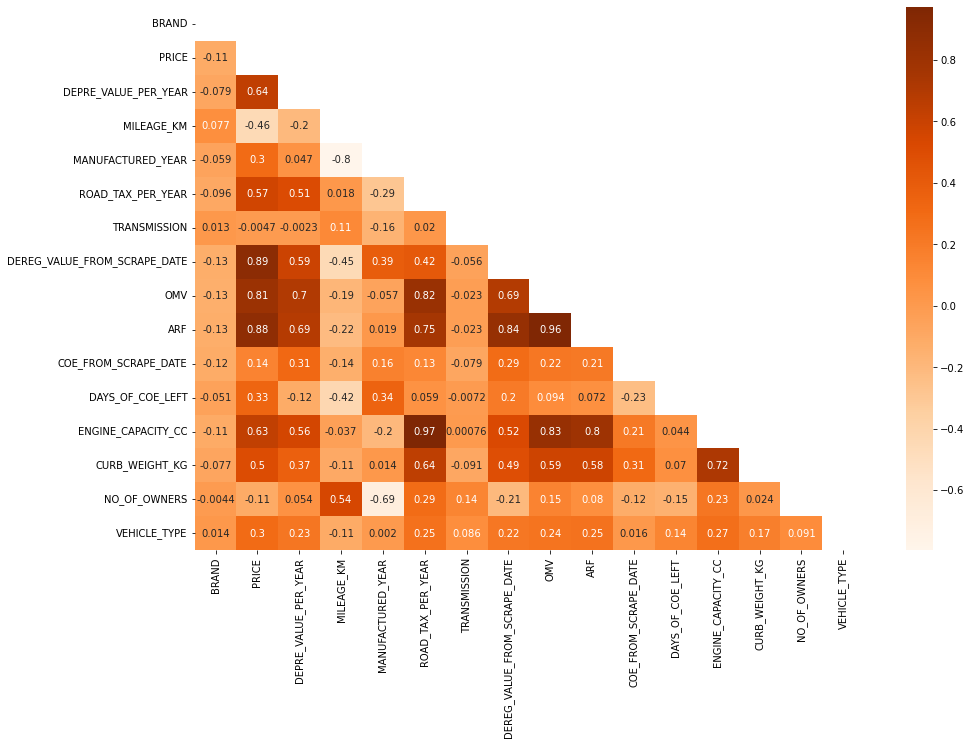

In [51]:
plt.figure(figsize=(15,10))
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df2.corr(),cbar=True, annot=True,mask=mask,cmap='Oranges')

In [52]:
df2.drop(['ARF','ROAD_TAX_PER_YEAR','DEREG_VALUE_FROM_SCRAPE_DATE'],axis=1, inplace=True)

C:\Users\derek\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

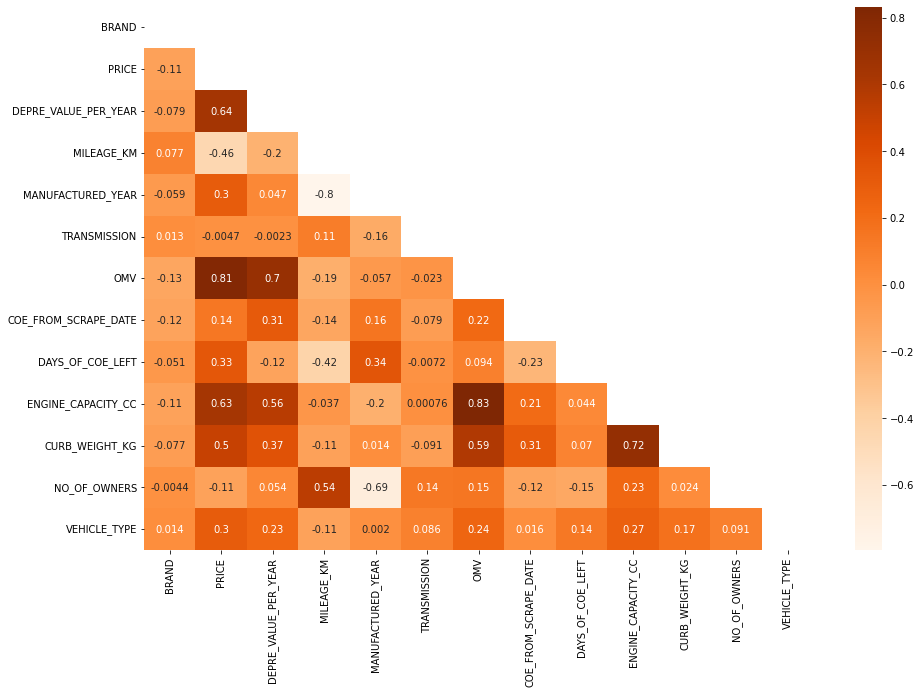

In [53]:
plt.figure(figsize=(15,10))
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df2.corr(),cbar=True, annot=True,mask=mask,cmap='Oranges')

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 1 to 9997
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BRAND                 5318 non-null   int32  
 1   PRICE                 5318 non-null   float64
 2   DEPRE_VALUE_PER_YEAR  5318 non-null   float64
 3   MILEAGE_KM            5318 non-null   float64
 4   MANUFACTURED_YEAR     5318 non-null   int32  
 5   TRANSMISSION          5318 non-null   int32  
 6   OMV                   5318 non-null   float64
 7   COE_FROM_SCRAPE_DATE  5318 non-null   float64
 8   DAYS_OF_COE_LEFT      5318 non-null   float64
 9   ENGINE_CAPACITY_CC    5318 non-null   float64
 10  CURB_WEIGHT_KG        5318 non-null   float64
 11  NO_OF_OWNERS          5318 non-null   float64
 12  VEHICLE_TYPE          5318 non-null   int32  
dtypes: float64(9), int32(4)
memory usage: 627.6 KB


In [55]:
# Correlations of the independent variables (features) to dependent variable (target, price)
df2.corr()['PRICE'].sort_values(ascending=False)

PRICE                   1.000000
OMV                     0.812262
DEPRE_VALUE_PER_YEAR    0.639739
ENGINE_CAPACITY_CC      0.633762
CURB_WEIGHT_KG          0.497698
DAYS_OF_COE_LEFT        0.331068
VEHICLE_TYPE            0.300638
MANUFACTURED_YEAR       0.299850
COE_FROM_SCRAPE_DATE    0.144820
TRANSMISSION           -0.004692
BRAND                  -0.106256
NO_OF_OWNERS           -0.108934
MILEAGE_KM             -0.455151
Name: PRICE, dtype: float64

In [94]:
# #spliting the data for model
# df2.to_csv('mlsgcarmartclean.csv')